In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('heart_disease_risk_dataset_earlymed.csv')

In [3]:
df = pd.DataFrame(dataset)

In [4]:
df.head()

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,48.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,46.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,66.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,60.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x = df.drop(['Heart_Risk'], axis='columns')

In [7]:
x.head()

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,48.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,46.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,66.0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,60.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0


In [8]:
y = df.Heart_Risk

In [9]:
y.head()

0    0.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: Heart_Risk, dtype: float64

In [10]:
X_test, X_train, y_test, y_train = train_test_split(x, y, test_size=0.3, random_state=4)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier(n_neighbors=10)

In [13]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [14]:
knn.score(X_train, y_train)

0.9936190476190476

In [15]:
knn.score(X_test, y_test)

0.9930408163265306

In [16]:
from sklearn.metrics import r2_score

In [17]:
knn_pred = knn.predict(X_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [27]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     24519
         1.0       0.99      0.99      0.99     24481

    accuracy                           0.99     49000
   macro avg       0.99      0.99      0.99     49000
weighted avg       0.99      0.99      0.99     49000



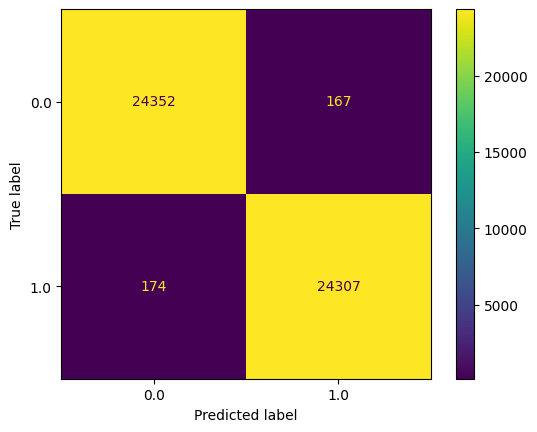

In [28]:
ConfusionMatrixDisplay.from_predictions(y_test, knn_pred)

In [18]:
score = r2_score(knn_pred, y_test

In [19]:
score

0.9721632339564285

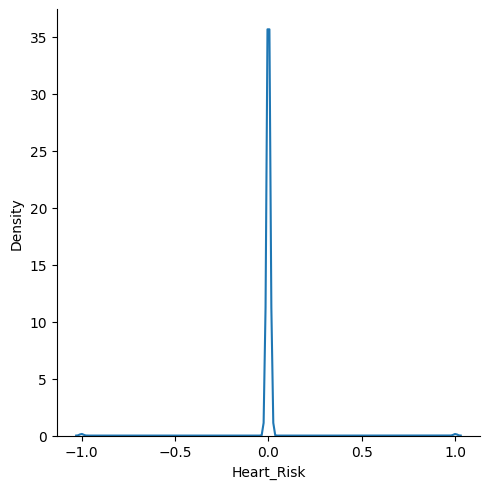

In [20]:
sns.displot(knn_pred-y_test, kind='kde')

In [21]:
y_test[:10]

42916    0.0
44559    0.0
27353    1.0
25359    1.0
32655    0.0
13796    1.0
8298     1.0
62138    1.0
13573    0.0
59346    0.0
Name: Heart_Risk, dtype: float64

In [22]:
knn.predict(X_test[:10])

array([0., 0., 1., 1., 0., 1., 1., 0., 0., 0.])